In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('output/preprocessed_data.csv', parse_dates=['Date&Time'])
df

,Date&Time,inner_temp,inner_hum,inner_CO2,inner_PPF,out_radn_m,out_temp,out_wind,out_hum,out_radn_w
0,2023-05-10 17:00:00,27.6,37,407,407,1.74,23.1,3.4,47.0,483.3372
1,2023-05-10 18:00:00,26.2,36,407,101,0.96,21.5,2.9,44.0,266.6688
2,2023-05-10 19:00:00,22.3,40,415,6,0.29,19.6,1.0,43.0,80.5562
3,2023-05-10 20:00:00,18.9,53,425,0,0.01,18.2,2.0,46.0,2.7778
4,2023-05-10 21:00:00,17.5,56,412,0,0.00,17.2,2.7,54.0,0.0000
...,...,...,...,...,...,...,...,...,...,...
7668,2024-03-27 09:00:00,11.1,52,426,0,1.16,8.9,0.8,76.0,322.2248
7669,2024-03-27 10:00:00,15.5,43,420,536,1.80,11.7,1.1,67.0,500.0040
7670,2024-03-27 11:00:00,18.0,36,418,1046,2.36,13.9,0.7,53.0,655.5608
7671,2024-03-27 12:00:00,19.1,36,430,902,2.70,15.2,1.2,56.0,750.0060


## Temp Graph

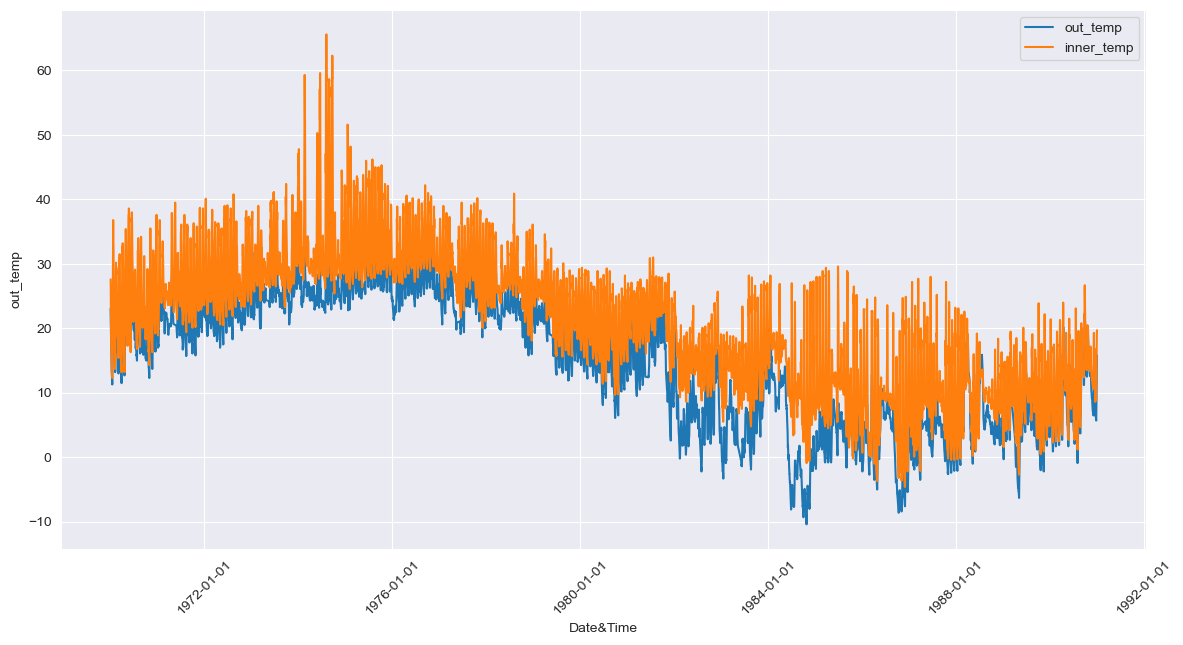

In [4]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=df, x='Date&Time', y='out_temp', label='out_temp', ax=ax)
sns.lineplot(data=df, x='Date&Time', y='inner_temp', label='inner_temp', ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend()
plt.show()

## Temp Graph (Random Date)

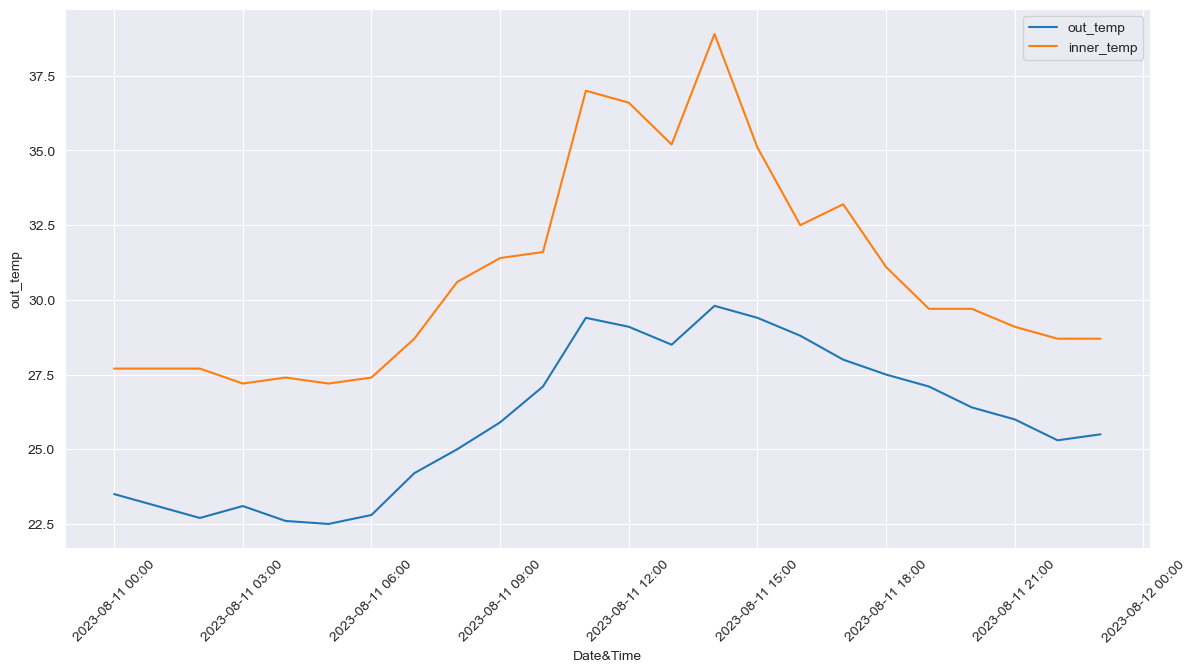

In [14]:
df['date'] = df['Date&Time'].dt.date
    
random_date = np.random.choice(df['date'].unique())

start_time = pd.to_datetime(f"{random_date} 00:00:00")
end_time = start_time + pd.Timedelta(days=1)

filtered_df = df[(df['Date&Time'] >= start_time) & (df['Date&Time'] < end_time)]

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=filtered_df, x='Date&Time', y='out_temp', label='out_temp', ax=ax)
sns.lineplot(data=filtered_df, x='Date&Time', y='inner_temp', label='inner_temp', ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.legend()
plt.show()

## Radiation Graph

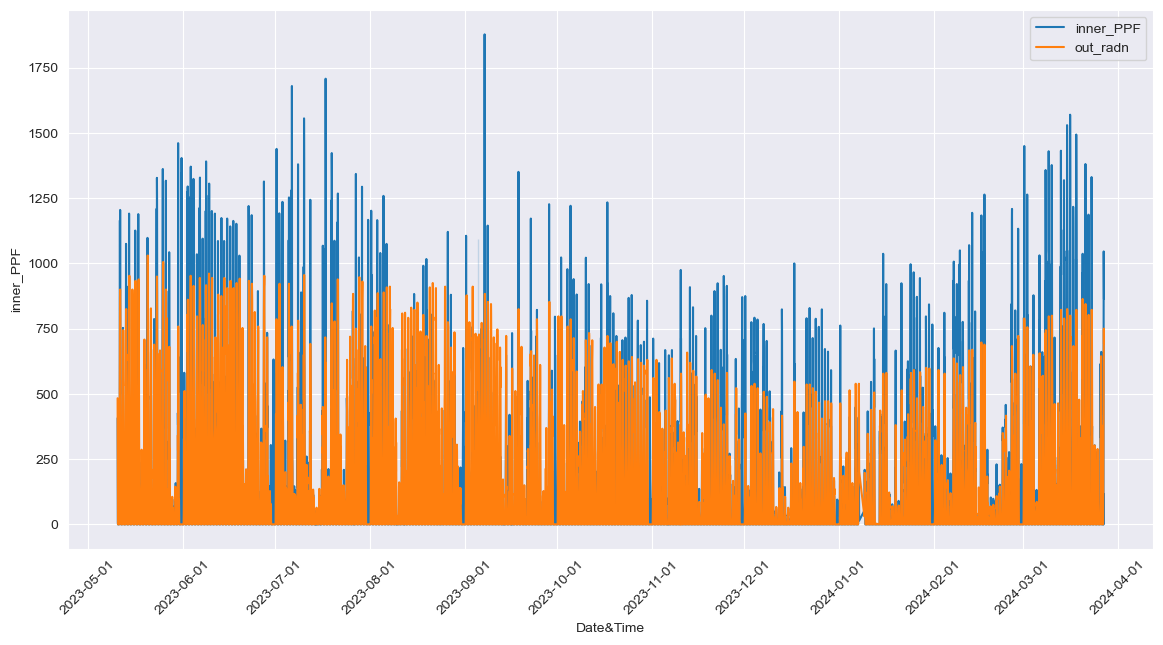

In [28]:
# df['out_radn'] = df['out_radn'] * 277.78

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=df, x='Date&Time', y='inner_PPF', label='inner_PPF', ax=ax)
sns.lineplot(data=df, x='Date&Time', y='out_radn_w', label='out_radn', ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend()
plt.show()

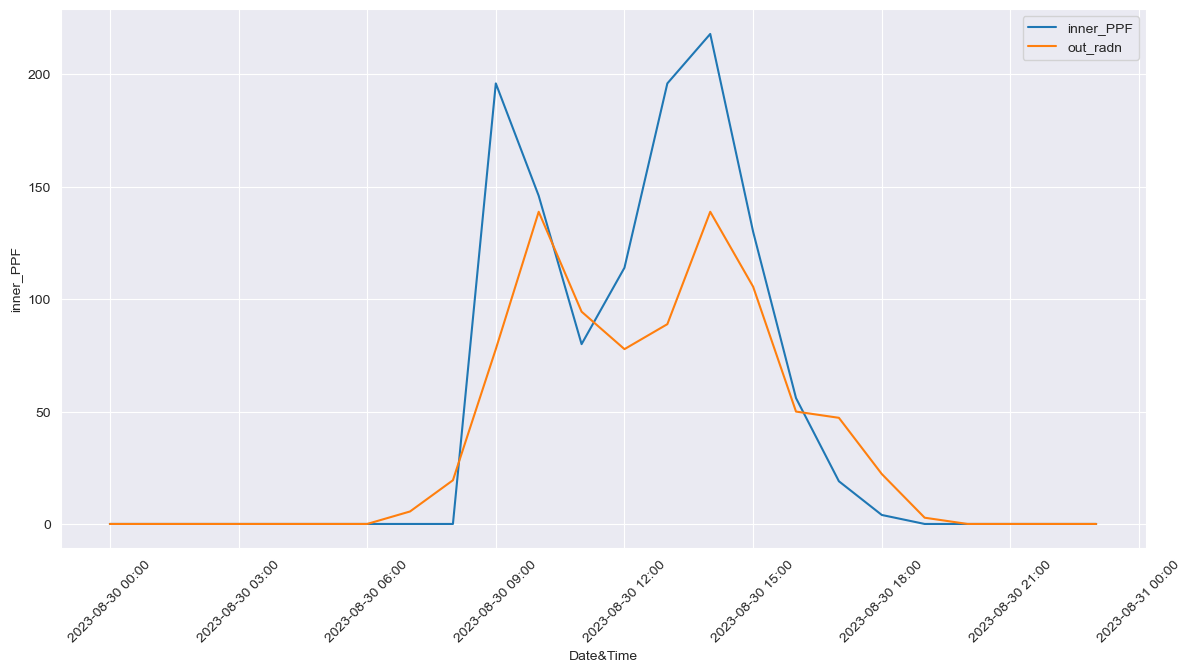

In [30]:
df['date'] = df['Date&Time'].dt.date
    
random_date = np.random.choice(df['date'].unique())

start_time = pd.to_datetime(f"{random_date} 00:00:00")
end_time = start_time + pd.Timedelta(days=1)

filtered_df = df[(df['Date&Time'] >= start_time) & (df['Date&Time'] < end_time)]

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=filtered_df, x='Date&Time', y='inner_PPF', label='inner_PPF', ax=ax)
sns.lineplot(data=filtered_df, x='Date&Time', y='out_radn_w', label='out_radn', ax=ax)


ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.legend()
plt.show()